# Urban Simulation Networks 2
## London Tube Network

Need to check that station lat-longs are correct

In [6]:
%matplotlib inline
import os
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# The python package geopadas is an extension of the data analysis library pandas for working with geographic data.
# It is dependent on a lot of other packages to run, so could take a while to install if the dependencies are not
# already installed.
import geopandas as gpd

In [7]:
# Set the directory to the data
data_dir = "..//data"
underground_dir = os.path.join(data_dir, "underground")

file_network = os.path.join(data_dir, "london_network.csv")
file_stations = os.path.join(data_dir, "london_stations.csv")
shp_underground = os.path.join(underground_dir, "underground.shp")

# Read in the shape file data to a geopandas dataframe
gdf_tube = gpd.read_file(shp_underground)

# Set the coordinate reference system
gdf_tube.crs = {'init' :'epsg:4326'}
gdf_tube.head()

,distance,geometry,station_1,station_1_,station_2,station_2_,toid_seq
0,416.586050,"LINESTRING (-0.1571 51.5226, -0.1631 51.5225)",11,Baker Street,163,Marylebone,1
1,734.173636,"LINESTRING (-0.1571 51.5226, -0.1466 51.5234)",11,Baker Street,212,Regent's Park,2
2,179.503418,"LINESTRING (-0.1247 51.508, -0.1223 51.5074)",49,Charing Cross,87,Embankment,3
3,689.289845,"LINESTRING (-0.1247 51.508, -0.1342 51.5098)",49,Charing Cross,197,Picadilly Circus,4
4,441.218104,"LINESTRING (-0.1679 51.5199, -0.1631 51.5225)",82,Edgware Road (B),163,Marylebone,5


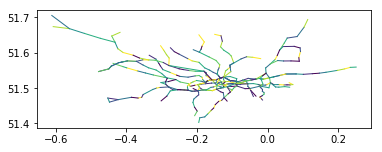

In [8]:
# Plot the tube
gdf_tube.plot()

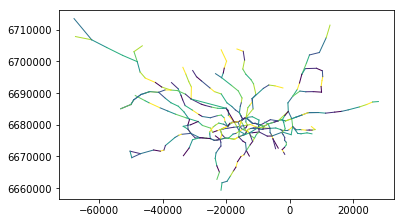

In [9]:
# Could also change the coordinate reference system and then plot, if desired
gdf_tube.to_crs({'init': 'epsg:3395'}).plot()

In [10]:
# Calculating the length of the linestring geometries assineged to each station pair 
# Why is this length diferent from the values in the distance field?
gdf_tube['linestring_length'] = gdf_tube['geometry'].length

# Find largest distance between stations using the 'distance' field
gdf_tube.sort_values(by = 'distance', ascending=False, inplace=True)
gdf_tube.head()

# Finchley Road to Wembley Park is the largest link acording to the distance field

,distance,geometry,station_1,station_1_,station_2,station_2_,toid_seq,linestring_length
239,7115.148277,"LINESTRING (-0.1803 51.5472, -0.2795 51.5635)",94,Finchley Road,282,Wembley Park,240,0.100530
228,5401.806740,"LINESTRING (-0.5610000000000001 51.6679, -0.61...",46,Chalfont & Latimer,50,Chesham,229,0.062380
230,3477.544282,"LINESTRING (-0.5183 51.6543, -0.4733 51.6404)",53,Chorleywood,214,Rickmansworth,231,0.047098
229,3319.569379,"LINESTRING (-0.5610000000000001 51.6679, -0.51...",46,Chalfont & Latimer,53,Chorleywood,230,0.044814
223,3244.890006,"LINESTRING (-0.607 51.6736, -0.561000000000000...",6,Amersham,46,Chalfont & Latimer,224,0.046352


In [11]:
# Check the data for pairs of duplicated nodes
gdf_tube.loc[gdf_tube.duplicated(subset=['station_1','station_2'], keep=False)].head()

,distance,geometry,station_1,station_1_,station_2,station_2_,toid_seq,linestring_length
244,2158.567464,"LINESTRING (-0.4499 51.5538, -0.4786 51.5463)",125,Hillingdon,271,Uxbridge,245,0.029664
339,2158.567464,"LINESTRING (-0.4499 51.5538, -0.4786 51.5463)",125,Hillingdon,271,Uxbridge,340,0.029664
102,2026.031984,"LINESTRING (0.081 51.5396, 0.0518 51.5394)",15,Barking,78,East Ham,103,0.029201
174,2026.031984,"LINESTRING (0.081 51.5396, 0.0518 51.5394)",15,Barking,78,East Ham,175,0.029201
245,1794.688161,"LINESTRING (-0.4421 51.5619, -0.4213 51.5715)",134,Ickenham,220,Ruislip,246,0.022909


In [12]:
# Search the data for all the stations connected to Baker Street
gdf_tube.loc[ gdf_tube['station_1_'] == 'Baker Street']

,distance,geometry,station_1,station_1_,station_2,station_2_,toid_seq,linestring_length
225,3175.274183,"LINESTRING (-0.1571 51.5226, -0.1803 51.5472)",11,Baker Street,94,Finchley Road,226,0.033814
197,1785.442777,"LINESTRING (-0.1571 51.5226, -0.174 51.5347)",11,Baker Street,249,St. John's Wood,198,0.020785
196,1076.607648,"LINESTRING (-0.1571 51.5226, -0.1494 51.5142)",11,Baker Street,28,Bond Street,197,0.011395
170,931.211577,"LINESTRING (-0.1571 51.5226, -0.17 51.5203)",11,Baker Street,83,Edgware Road (C),171,0.013103
75,931.211577,"LINESTRING (-0.1571 51.5226, -0.17 51.5203)",11,Baker Street,83,Edgware Road (C),76,0.013103
171,925.826411,"LINESTRING (-0.1571 51.5226, -0.1439 51.5238)",11,Baker Street,104,Great Portland Street,172,0.013254
224,925.826411,"LINESTRING (-0.1571 51.5226, -0.1439 51.5238)",11,Baker Street,104,Great Portland Street,225,0.013254
76,925.826411,"LINESTRING (-0.1571 51.5226, -0.1439 51.5238)",11,Baker Street,104,Great Portland Street,77,0.013254
1,734.173636,"LINESTRING (-0.1571 51.5226, -0.1466 51.5234)",11,Baker Street,212,Regent's Park,2,0.010530
0,416.586050,"LINESTRING (-0.1571 51.5226, -0.1631 51.5225)",11,Baker Street,163,Marylebone,1,0.006001


In [13]:
# Alternatively, use regular expressions to search for any station that begins with 'Baker' in case of poor data entry
import re
baker_re = re.compile('^Baker')
baker_select_series = gdf_tube['station_1_'].map(lambda x: baker_re.search(x.strip()) is not None)

gdf_tube.loc[baker_select_series]

,distance,geometry,station_1,station_1_,station_2,station_2_,toid_seq,linestring_length
225,3175.274183,"LINESTRING (-0.1571 51.5226, -0.1803 51.5472)",11,Baker Street,94,Finchley Road,226,0.033814
197,1785.442777,"LINESTRING (-0.1571 51.5226, -0.174 51.5347)",11,Baker Street,249,St. John's Wood,198,0.020785
196,1076.607648,"LINESTRING (-0.1571 51.5226, -0.1494 51.5142)",11,Baker Street,28,Bond Street,197,0.011395
170,931.211577,"LINESTRING (-0.1571 51.5226, -0.17 51.5203)",11,Baker Street,83,Edgware Road (C),171,0.013103
75,931.211577,"LINESTRING (-0.1571 51.5226, -0.17 51.5203)",11,Baker Street,83,Edgware Road (C),76,0.013103
171,925.826411,"LINESTRING (-0.1571 51.5226, -0.1439 51.5238)",11,Baker Street,104,Great Portland Street,172,0.013254
224,925.826411,"LINESTRING (-0.1571 51.5226, -0.1439 51.5238)",11,Baker Street,104,Great Portland Street,225,0.013254
76,925.826411,"LINESTRING (-0.1571 51.5226, -0.1439 51.5238)",11,Baker Street,104,Great Portland Street,77,0.013254
1,734.173636,"LINESTRING (-0.1571 51.5226, -0.1466 51.5234)",11,Baker Street,212,Regent's Park,2,0.010530
0,416.586050,"LINESTRING (-0.1571 51.5226, -0.1631 51.5225)",11,Baker Street,163,Marylebone,1,0.006001


In [14]:
# Create a geographic data frame of all the stations and their coordinates, with no duplicated stations
gdf_stations1 = gdf_tube.reindex(columns = ['station_1','station_1_','toid_seq', 'geometry']).rename(columns = {'station_1':'station_id', 'station_1_':'station_nm'})
gdf_stations2 = gdf_tube.reindex(columns = ['station_2','station_2_','toid_seq', 'geometry']).rename(columns = {'station_2':'station_id', 'station_2_':'station_nm'})

# So, to view the coordinatates of a linesting view the y attribute of the linestring geometry
# This gives an array of two lists, with longitude of the linestring coordinates
# in the first list and latitudes in the second list:
# array( [lon1,lon2],[lat1,lat2])
print(gdf_stations1.loc[0,'geometry'].xy)

# Extract this info into new lat lon fields in the geo dataframe
# Now get the lat and longs of the stations from the linestring geometry
gdf_stations1['long'] = gdf_stations1['geometry'].map(lambda x: x.xy[0][0])
gdf_stations1['lat'] = gdf_stations1['geometry'].map(lambda x: x.xy[1][0])

gdf_stations2['long'] = gdf_stations1['geometry'].map(lambda x: x.xy[0][1])
gdf_stations2['lat'] = gdf_stations1['geometry'].map(lambda x: x.xy[1][1])

# Now check the top rows of the geo dataframe
gdf_stations1.head()

(array('d', [-0.1571, -0.1631]), array('d', [51.5226, 51.5225]))


,station_id,station_nm,toid_seq,geometry,long,lat
239,94,Finchley Road,240,"LINESTRING (-0.1803 51.5472, -0.2795 51.5635)",-0.1803,51.5472
228,46,Chalfont & Latimer,229,"LINESTRING (-0.5610000000000001 51.6679, -0.61...",-0.5610,51.6679
230,53,Chorleywood,231,"LINESTRING (-0.5183 51.6543, -0.4733 51.6404)",-0.5183,51.6543
229,46,Chalfont & Latimer,230,"LINESTRING (-0.5610000000000001 51.6679, -0.51...",-0.5610,51.6679
223,6,Amersham,224,"LINESTRING (-0.607 51.6736, -0.561000000000000...",-0.6070,51.6736


In [15]:
# Combine the geo dataframes of 1st and 2nd stations and drop duplicate stations
gdf_stations = pd.concat([gdf_stations1, gdf_stations2]).drop_duplicates(subset = 'station_id')
gdf_stations.head()

# Great, we have stations and their coordinates. Write this to file

,station_id,station_nm,toid_seq,geometry,long,lat
239,94,Finchley Road,240,"LINESTRING (-0.1803 51.5472, -0.2795 51.5635)",-0.1803,51.5472
228,46,Chalfont & Latimer,229,"LINESTRING (-0.5610000000000001 51.6679, -0.61...",-0.5610,51.6679
230,53,Chorleywood,231,"LINESTRING (-0.5183 51.6543, -0.4733 51.6404)",-0.5183,51.6543
223,6,Amersham,224,"LINESTRING (-0.607 51.6736, -0.561000000000000...",-0.6070,51.6736
39,68,Debden,40,"LINESTRING (0.0838 51.6455, 0.1033 51.6717)",0.0838,51.6455


In [16]:
# Now create a network of tube stations using the underground shape file data

# Get dataframe of stations and weights (the distance between them)
df_network = pd.DataFrame(gdf_tube.reindex(columns = ['station_1', 'station_2', 'distance']).rename(columns = {'distance':'weight'}))
graph_tube = nx.from_pandas_dataframe(df_network, source = 'station_1', target = 'station_2', edge_attr='weight')

# Save the tube network dataframe
df_network.to_csv('../data/tube_network.csv', index = False)

In [17]:
# Check that the network has been created correctly by comparing to some other data
df_network2 = pd.read_csv('../data/london_network.csv')
graph_tube2 = nx.from_pandas_dataframe(df_network2, source = 'station_1',target = 'station_2', edge_attr='distance')

In [18]:
# Check networks are isomorphic - an equivalence relation for graphs
nx.is_isomorphic(graph_tube, graph_tube2)

True

C:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


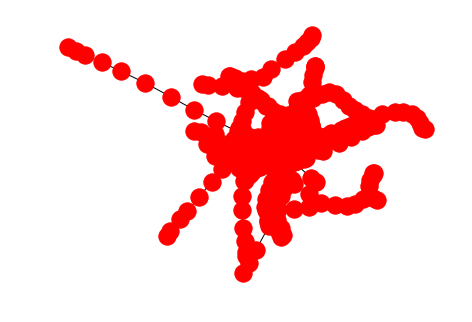

In [19]:
nx.draw(graph_tube)

C:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


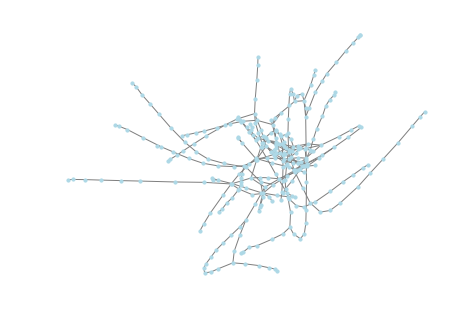

In [25]:
# Try to make the drawing better

# Use a spring layout for the points
spring_pos = nx.spring_layout(graph_tube)
nx.draw(graph_tube, spring_pos, width = 1, edge_color='grey', node_size=10, node_color='lightblue')

In [36]:
# The plot can be improved further by calculating the betweenness centrality 
# of nodes and using this to colour the nodes.

# Graph diameter without weights
d = nx.diameter(graph_tube)
d

38

In [64]:
# Calculate node betweenness centralities 
node_betcen = nx.betweenness_centrality(graph_tube, weight='weight')
list_node_betcen = [v for k,v in node_betcen.items()]

# use node betweenness to generate a pallett and node sizes

# unpack betweenness values for each node into a list
from matplotlib import cm # for generating colour maps
redblue = cm.get_cmap('RdBu') # get a preset colourmap

# Normalise betweenness centrality measures so that they lie between 0-1.
# This is for generating colours and not for analysis
max_betcen = float(max(list_node_betcen))
list_node_betcen_norm = [i/max_betcen for i in list_node_betcen]
palette = [redblue(i) for i in list_node_betcen_norm]
node_sizes = [100*v for k,v in node_betcen.items()]

C:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


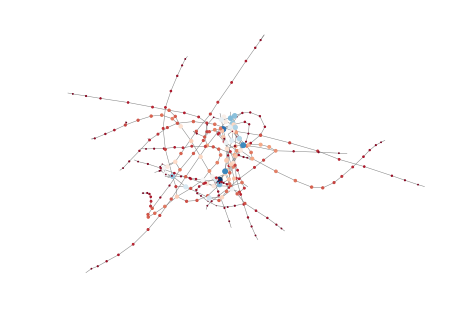

In [67]:
pos = nx.spring_layout(graph_tube)
nx.draw(graph_tube,pos, node_size = node_sizes, node_color = palette, width=0.5, edge_color='grey')